In [1]:
import sys
import os

# Check where you are
print("Current directory:", os.getcwd())

# Add parent to path
sys.path.append('..')
import data_vis

Current directory: /Users/jonathan/Documents/uni/potsdam/semester1/aibas/team_report/aibas-course-ftr/data_visualization


dlopen(/Applications/anaconda3/lib/gdalplugins/gdal_HDF4.dylib, 0x0001): Library not loaded: @rpath/libgdal.36.dylib
  Referenced from: <85FF2FCA-952B-3B9A-8A21-23F3117518E7> /Applications/anaconda3/lib/gdalplugins/gdal_HDF4.dylib
  Reason: tried: '/Applications/anaconda3/lib/gdalplugins/../libgdal.36.dylib' (no such file), '/Applications/anaconda3/lib/gdalplugins/../libgdal.36.dylib' (no such file), '/opt/anaconda3/lib/libgdal.36.dylib' (no such file), '/opt/anaconda3/bin/../lib/libgdal.36.dylib' (no such file), '/usr/local/lib/libgdal.36.dylib' (no such file), '/usr/lib/libgdal.36.dylib' (no such file, not in dyld cache)
dlopen(/Applications/anaconda3/lib/gdalplugins/gdal_HDF4.dylib, 0x0001): Library not loaded: @rpath/libgdal.36.dylib
  Referenced from: <85FF2FCA-952B-3B9A-8A21-23F3117518E7> /Applications/anaconda3/lib/gdalplugins/gdal_HDF4.dylib
  Reason: tried: '/Applications/anaconda3/lib/gdalplugins/../libgdal.36.dylib' (no such file), '/Applications/anaconda3/lib/gdalplugins/..

In [5]:
shapefile_path = './shapefile_states_ger/NUTS250_N1.shp'
population_data_path = '../data/raw/population_raw.csv'

In [6]:
map_ger_gdf = data_vis.load_shapefile(shapefile_path)
population_df = data_vis.load_population_csv(population_data_path)
population_map_gdf = data_vis.merge_map_population(map_ger_gdf, population_df)

In [9]:
population_map_gdf = data_vis.merge_map_population(map_ger_gdf, population_df)

In [31]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [32]:
# Get all year columns
year_columns = sorted([col for col in population_map_gdf.columns if isinstance(col, int)])

# Calculate global min/max for consistent color scale
vmin = population_map_gdf[year_columns].min().min()
vmax = population_map_gdf[year_columns].max().max()
bounds = population_map_gdf.total_bounds  # [minx, miny, maxx, maxy]

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

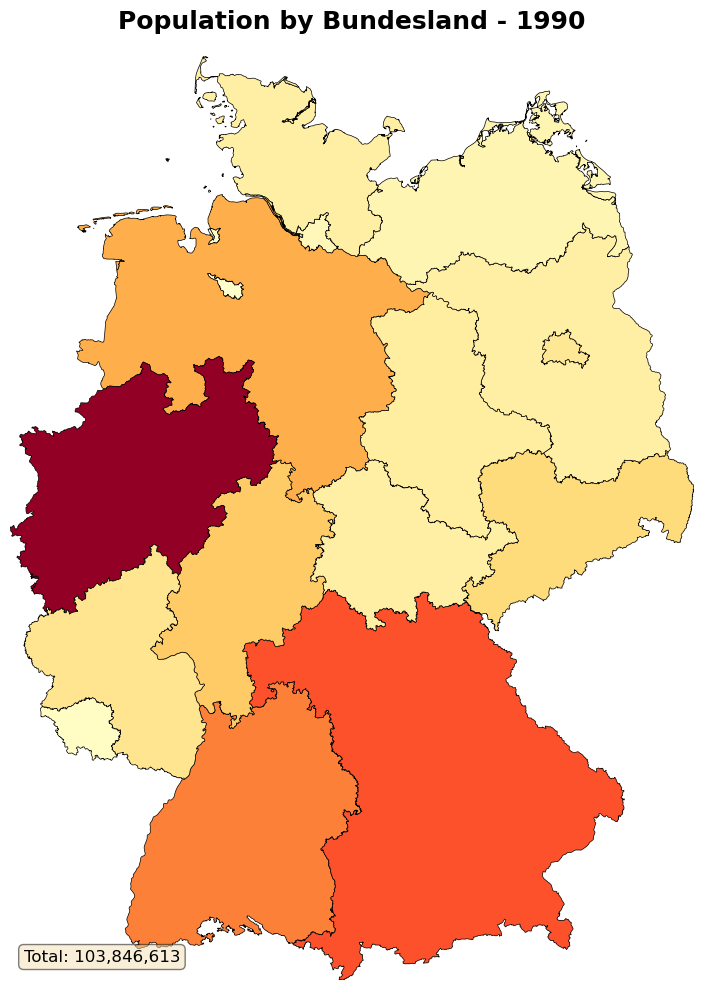

In [53]:
fig, ax = plt.subplots(figsize=(14, 12))
def update(frame):
    ax.clear()
    year = year_columns[frame]
    
    population_map_gdf.plot(
        column=year,
        cmap='YlOrRd',
        ax=ax,
        edgecolor='black',
        linewidth=0.5,
        vmin=vmin,
        vmax=vmax,
        legend_kwds={
            'label': "Population",
            'shrink': 0.6,
            'orientation': 'vertical'
        }
    )
    ax.set_xlim(bounds[0], bounds[2])
    ax.set_ylim(bounds[1], bounds[3])
    
    ax.set_title(f'Population by Bundesland - {year}', 
                 fontsize=18, 
                 fontweight='bold',
                 pad=20)
    ax.axis('off')
    
    # Add total population text
    total_pop = population_map_gdf[year].sum()
    ax.text(0.02, 0.02, f'Total: {total_pop:,.0f}',
            transform=ax.transAxes,
            fontsize=12,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

anim = animation.FuncAnimation(
    fig, 
    update, 
    frames=len(year_columns),
    interval=100,  # milliseconds between frames
    repeat=True,
    blit=False
)

plt.close

In [54]:
# Saving animation
'''
print("Saving animation... this may take a minute")
anim.save('population_evolution.gif', 
         writer='pillow', 
         fps=2,
         dpi=100)
print("Animation saved as 'population_evolution.gif'")
plt.close()
'''

'\nprint("Saving animation... this may take a minute")\nanim.save(\'population_evolution.gif\', \n         writer=\'pillow\', \n         fps=2,\n         dpi=100)\nprint("Animation saved as \'population_evolution.gif\'")\nplt.close()\n'

In [55]:
HTML(anim.to_jshtml())

<Figure size 640x480 with 0 Axes>